### **Project Name: Predicting Customer Churn Using ML**
In this Notebook, my aim is to build a model that uses the information about each customer in the dataset to classify whether or not a new customer will churn. Here model has two outcomes or classes: either  customer will churn or not churn.
'Yes'- customer will churn
'no'- customer will not churn

**-By Md. Azim Khan**

**Customer churn:**
It is when an existing customer, user, player, subscriber or any kind of return client stops doing business or ends the relationship with a company.

**Importing Libraries**

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.metrics import plot_confusion_matrix
# to remove unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

**Import Data**

In [113]:
url = 'https://raw.githubusercontent.com/SKawsar/machine_learning_with_python/main/Churn.csv'
df = pd.read_csv(url)

In [114]:
# show some observation from dataset
display(df.head(5))
display(df.shape)

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code,Phone
0,128,25,265.1,197.4,244.7,10.0,1,no,no,yes,110,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,no,no,yes,123,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,no,no,no,114,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,no,yes,no,71,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,no,yes,no,113,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626


(3333, 21)

In [115]:
# columns name
print(df.columns)

Index(['Account_Length', 'Vmail_Message', 'Day_Mins', 'Eve_Mins', 'Night_Mins',
       'Intl_Mins', 'CustServ_Calls', 'Churn', 'Intl_Plan', 'Vmail_Plan',
       'Day_Calls', 'Day_Charge', 'Eve_Calls', 'Eve_Charge', 'Night_Calls',
       'Night_Charge', 'Intl_Calls', 'Intl_Charge', 'State', 'Area_Code',
       'Phone'],
      dtype='object')


**Explaination of each feature and Target variable:**
1. **CustServ_Calls** which denotes the number of customer service calls the customer made
2.**State** which indicates the state the customer is from.
3. '**Churn**' indicate whether or not the customer has churned.

('Vmail_Message','Day_Mins', 'Eve_Mins', 'Night_Mins','Intl_Mins',  'Intl_Plan', 'Vmail_Plan','Day_Calls', 'Day_Charge', 'Eve_Calls', 'Eve_Charge', 'Night_Calls','Night_Charge', 'Intl_Calls', 'Intl_Charge') all indicates a customer record of voice mail and international calling, cost for the service and a customar's usage information.

In [116]:
# check for missing values, data types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account_Length  3333 non-null   int64  
 1   Vmail_Message   3333 non-null   int64  
 2   Day_Mins        3333 non-null   float64
 3   Eve_Mins        3333 non-null   float64
 4   Night_Mins      3333 non-null   float64
 5   Intl_Mins       3333 non-null   float64
 6   CustServ_Calls  3333 non-null   int64  
 7   Churn           3333 non-null   object 
 8   Intl_Plan       3333 non-null   object 
 9   Vmail_Plan      3333 non-null   object 
 10  Day_Calls       3333 non-null   int64  
 11  Day_Charge      3333 non-null   float64
 12  Eve_Calls       3333 non-null   int64  
 13  Eve_Charge      3333 non-null   float64
 14  Night_Calls     3333 non-null   int64  
 15  Night_Charge    3333 non-null   float64
 16  Intl_Calls      3333 non-null   int64  
 17  Intl_Charge     3333 non-null   f

**Comment:**
* There is no missing value in the dataset
* Number of observations (rows) = 3333
* Number of columns = 21 (20 feature variables and 1 target variable)

In [117]:
#statistics of the numerical variables
df.describe()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,Area_Code
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,200.980348,200.872037,10.237294,1.562856,100.435644,30.562307,100.114311,17.083540,100.107711,9.039325,4.479448,2.764581,437.182418
std,39.822106,13.688365,54.467389,50.713844,50.573847,2.791840,1.315491,20.069084,9.259435,19.922625,4.310668,19.568609,2.275873,2.461214,0.753773,42.371290
min,1.000000,0.000000,0.000000,0.000000,23.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,1.040000,0.000000,0.000000,408.000000
25%,74.000000,0.000000,143.700000,166.600000,167.000000,8.500000,1.000000,87.000000,24.430000,87.000000,14.160000,87.000000,7.520000,3.000000,2.300000,408.000000
50%,101.000000,0.000000,179.400000,201.400000,201.200000,10.300000,1.000000,101.000000,30.500000,100.000000,17.120000,100.000000,9.050000,4.000000,2.780000,415.000000
75%,127.000000,20.000000,216.400000,235.300000,235.300000,12.100000,2.000000,114.000000,36.790000,114.000000,20.000000,113.000000,10.590000,6.000000,3.270000,510.000000
max,243.000000,51.000000,350.800000,363.700000,395.000000,20.000000,9.000000,165.000000,59.640000,170.000000,30.910000,175.000000,17.770000,20.000000,5.400000,510.000000


**Comment:**
1. Customer call service center aveage 1.56
2. Evening Charge is the highest (30.91$) than other time (day charge and night charge
3. Customer uses highest night time calls and it is 175

**Question:** How many churners does the dataset have, and how many non-churners?

In [118]:
# target value distribution
df.Churn.value_counts()

no     2850
yes     483
Name: Churn, dtype: int64

**Comment:** 483 Churners and 2850 Non-Churners. and Most of the customers did not churn

**Data Preprocessing:**

Data preprocesssing is important, because if the features in the dataset do not meet the following assumptions, then result of ML models wouldn't be reliable.
* Features are normally distributed
* Features are on the same scale

**Steps to data preprocessing:**
* **check Data types:** as Machine learning models require numeric data types. so need to encode categorical variables as numeric.

* **Feature scaling:** Features should be on the same scale. By **Standardization** process we scale data. Standardization centers the distribution around the mean and calculates the number of standard deviations away from the mean each point is.
* **Feature engineering:** Creating new features to help improve the model performance. It is need to consult with subject matter experts.
Example: Total Minutes: sum of 'Day_Mins', 'Eve_Mins', 'Night_Mins', 'Intl_Mins'
Here Total Minutes features can be made by summing  4 features.
* **Feature selection:** means **dropping unnecessary features** from dataset because some features provide no predictive power. some example are
1. **Unique identifiers.** Ex: Phone numbers, SSN, account number
2. **Dropping highly correlated features:** they don't provide no additional info to the model

**Data_types and Encoding**

In [119]:
# Use dtypes attribute to check data types
df.dtypes

Account_Length      int64
Vmail_Message       int64
Day_Mins          float64
Eve_Mins          float64
Night_Mins        float64
Intl_Mins         float64
CustServ_Calls      int64
Churn              object
Intl_Plan          object
Vmail_Plan         object
Day_Calls           int64
Day_Charge        float64
Eve_Calls           int64
Eve_Charge        float64
Night_Calls         int64
Night_Charge      float64
Intl_Calls          int64
Intl_Charge       float64
State              object
Area_Code           int64
Phone              object
dtype: object

**Comment:** Churn, Vmail_Plan, and Intl_Plan, State in particular, are binary features that can easily be converted into 0s and 1s.

In [120]:
# Encoding binary features Churn, Vmail_plan, Intl_plan
# Replace 'no' with 0 and 'yes' with 1 in 'Vmail_Plan'
df['Vmail_Plan'] = df['Vmail_Plan'].replace({'no':0, 'yes':1})

# Replace 'no' with 0 and 'yes' with 1 in 'Churn'
df['Churn'] = df['Churn'].replace({'no':0, 'yes':1})

# Print the results to verify
print(df['Vmail_Plan'].head())
print(df['Churn'].sample(10))

0    1
1    1
2    0
3    0
4    0
Name: Vmail_Plan, dtype: int64
2452    0
563     0
1394    0
2979    1
1547    0
2065    0
1485    0
2786    1
144     1
151     0
Name: Churn, dtype: int64


In [121]:
# using LabelEncoder() recasting datatypes
from sklearn.preprocessing import LabelEncoder

df['Intl_Plan'] = LabelEncoder().fit_transform(df['Intl_Plan'])
df['Intl_Plan'].head()

0    0
1    0
2    0
3    1
4    1
Name: Intl_Plan, dtype: int64

In [122]:
# total number of state in the dataset
df.State.value_counts().shape

(51,)

In [123]:
# pandas has a get_dummies() function which automatically applies one hot encoding over the selected feature.
# here level encoding is not performed because there are 51 state in the dataset, and we get 0 to 50 value for each state, 
# this value can make order the state and model will be give most important for highest number, less value for lowes number

d = pd.get_dummies(df['State'])
d.head()

,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,HI,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


**Comment:**
Notice that this creates an entirely new DataFrame. Once we merge this back into the original (df) DataFrame,we can begin using these state features in models.Now, we have many more features in our dataset, so we should consider dropping any that are unnecessary.

**Feature Scaling**

In [124]:
# check current scale of the features
df_3 = df.loc[:,['Intl_Calls', 'Night_Mins']]
display(df_3.describe())

,Intl_Calls,Night_Mins
count,3333.000000,3333.000000
mean,4.479448,200.872037
std,2.461214,50.573847
min,0.000000,23.200000
25%,3.000000,167.000000
50%,4.000000,201.200000
75%,6.000000,235.300000
max,20.000000,395.000000


**Comment:** The international calls feature ranges from 0 to 20, while the night minutes feature ranges from 23 to 395. That's why it is needed to rescale data and ensure all features are on the same scale

**Data Transformation using StandardScaler**

In [125]:
# Features scaling by standardization process
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Scale df_3 using StandardScaler
df_3_scaled = StandardScaler().fit_transform(df_3)  

# Add column names back for readability
df_3_scaled = pd.DataFrame(df_3_scaled, columns=["Intl_Calls", "Night_Mins"])
# Print summary statistics using .describe()
display(df_3_scaled.describe())

,Intl_Calls,Night_Mins
count,3.333000e+03,3.333000e+03
mean,-1.264615e-16,6.602046e-17
std,1.000150e+00,1.000150e+00
min,-1.820289e+00,-3.513648e+00
25%,-6.011951e-01,-6.698545e-01
50%,-1.948306e-01,6.485803e-03
75%,6.178983e-01,6.808485e-01
max,6.307001e+00,3.839081e+00


**Comment:** Both feature are same scale now.
**Decision trees** and ensemble methods do not require feature scaling to be performed as they are not sensitive to the the variance in the data. Here we will not data scaling.It is generally useful, when you are solving a system of equations, least squares, etc, where you can have serious issues due to rounding errors

**Feature Engineering**
Here create a new feature that contains information about the average length of night calls made by customers.

In [126]:
# Create the new feature
df['Avg_Night_Calls'] = df['Night_Mins'] / df['Night_Calls']

# # Print the first five rows of 'Avg_Night_Calls'
print(df['Avg_Night_Calls'].head())

0    2.689011
1    2.469903
2    1.563462
3    2.212360
4    1.544628
Name: Avg_Night_Calls, dtype: float64


**Feature selection:**
1. use.drop() method for drop unnecessary features
2. use .corr() method and heat map for feature selection

Some features such as 'Area_Code' and 'Phone' are unique identifiers and they are not useful when it comes to predicting customer churn, and they need to be dropped prior to modeling.

In [127]:
# before drop features, check the columns
print(df.columns)
print(df.shape)

Index(['Account_Length', 'Vmail_Message', 'Day_Mins', 'Eve_Mins', 'Night_Mins',
       'Intl_Mins', 'CustServ_Calls', 'Churn', 'Intl_Plan', 'Vmail_Plan',
       'Day_Calls', 'Day_Charge', 'Eve_Calls', 'Eve_Charge', 'Night_Calls',
       'Night_Charge', 'Intl_Calls', 'Intl_Charge', 'State', 'Area_Code',
       'Phone', 'Avg_Night_Calls'],
      dtype='object')
(3333, 22)


In [128]:
# here drop this features 'State', 'Area_Code', "Phone", "Avg_Night_Calls" 
# axis=1 indicates drop these features from the columns.
df.drop(['State','Area_Code','Phone','Avg_Night_Calls'],axis = 1, inplace = True) 
# Verify dropped features
print(df.columns)
print(df.shape)

Index(['Account_Length', 'Vmail_Message', 'Day_Mins', 'Eve_Mins', 'Night_Mins',
       'Intl_Mins', 'CustServ_Calls', 'Churn', 'Intl_Plan', 'Vmail_Plan',
       'Day_Calls', 'Day_Charge', 'Eve_Calls', 'Eve_Charge', 'Night_Calls',
       'Night_Charge', 'Intl_Calls', 'Intl_Charge'],
      dtype='object')
(3333, 18)


### **Machine Learning Model**

**Separating the features and target variable and create train test dataset**

In [129]:
from sklearn.model_selection import train_test_split

features = df.drop('Churn', axis=1)
display(features.shape)
X_train, X_test, y_train, y_test = train_test_split(features, df['Churn'], test_size=0.2, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

(3333, 17)

((2666, 17), (2666,), (667, 17), (667,))

**Comment:** Data is seperated in by train test split, here 80% data is training data that will be used train the ML model and 20% data will be used to test the model.

**Random state:**  This argument allows to spedify a seed. Setting a seed ensure that results are reproducible, as all splits will be same seed and will be identical

**Model_selection**

**Decision tree classifier (Use Grid Search and cross-validation)**
In machine learning, a **hyperparameter** is a parameter whose value is used to control the learning process. Each machie learning algortihm has its own specific hyperparameters. Normally, ML model used defalut hyperparameter which do not need to tune them. ButThe default hyperparameters used by models are not optimized for data. 
The goal of grid search cross-validation is to identify those hyperparameters that lead to optimal model performance.  **Grid Search** is one of the most effective ways to tune hypereparameter. Scikit-learn implementation of grid search uses a technique called cross validation (CV) to ensure the models are being tested an unseen data.

In [130]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
# Import Gridsearch 
from sklearn.model_selection import GridSearchCV
# Instantiate the classifier
model_DT= DecisionTreeClassifier(random_state=42)

In [131]:
# parameter select for tuning
parameters = {'criterion': ['gini','entropy'],
              'max_depth': [3, 4, 5, 6, 7]}

grid_search = GridSearchCV(estimator=model_DT,
                           param_grid=parameters,
                           scoring="accuracy",
                           cv=5,
                           n_jobs=-1)

# fit the model with the best hyper-parameters
grid_result = grid_search.fit(X_train, y_train)

In [132]:
y_pred = np.round(grid_result.predict(X_test), 2)

In [133]:
#Best hyperparameters in the grid search
grid_result.best_params_

{'criterion': 'gini', 'max_depth': 6}

**Comment:** model shows the highest perfomance when it is used **gini** criterion with max_depth 6 under 5 cross validation

In [134]:
grid_result.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [135]:
cv_result = pd.DataFrame(grid_result.cv_results_)
cv_result = cv_result[['param_criterion', 'param_max_depth',
                       'split0_test_score',
                       'split1_test_score', 'split2_test_score', 'split3_test_score',
                       'split4_test_score', 'mean_test_score', 'std_test_score',
                       'rank_test_score']]
cv_result = cv_result.sort_values(by='rank_test_score')
display(cv_result)
print(cv_result.columns)

,param_criterion,param_max_depth,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3,gini,6,0.941948,0.936210,0.934334,0.938086,0.953096,0.940735,0.006674,1
4,gini,7,0.938202,0.932458,0.938086,0.938086,0.947467,0.938860,0.004831,2
8,entropy,6,0.934457,0.934334,0.936210,0.936210,0.951220,0.938486,0.006418,3
2,gini,5,0.932584,0.938086,0.932458,0.936210,0.951220,0.938112,0.006899,4
9,entropy,7,0.940075,0.930582,0.932458,0.936210,0.951220,0.938109,0.007321,5
7,entropy,5,0.930712,0.921201,0.924953,0.938086,0.949343,0.932859,0.010021,6
1,gini,4,0.910112,0.915572,0.915572,0.913696,0.924953,0.915981,0.004909,7
6,entropy,4,0.906367,0.917448,0.917448,0.909944,0.924953,0.915232,0.006494,8
0,gini,3,0.889513,0.898687,0.887430,0.908068,0.908068,0.898353,0.008790,9
5,entropy,3,0.885768,0.879925,0.887430,0.898687,0.906191,0.891600,0.009496,10


Index(['param_criterion', 'param_max_depth', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score'],
      dtype='object')


**Comment:** For best criterion params gini, mean_test_score is 0.940735 and standard deviation is 0.006674 

**Tree Diagram**

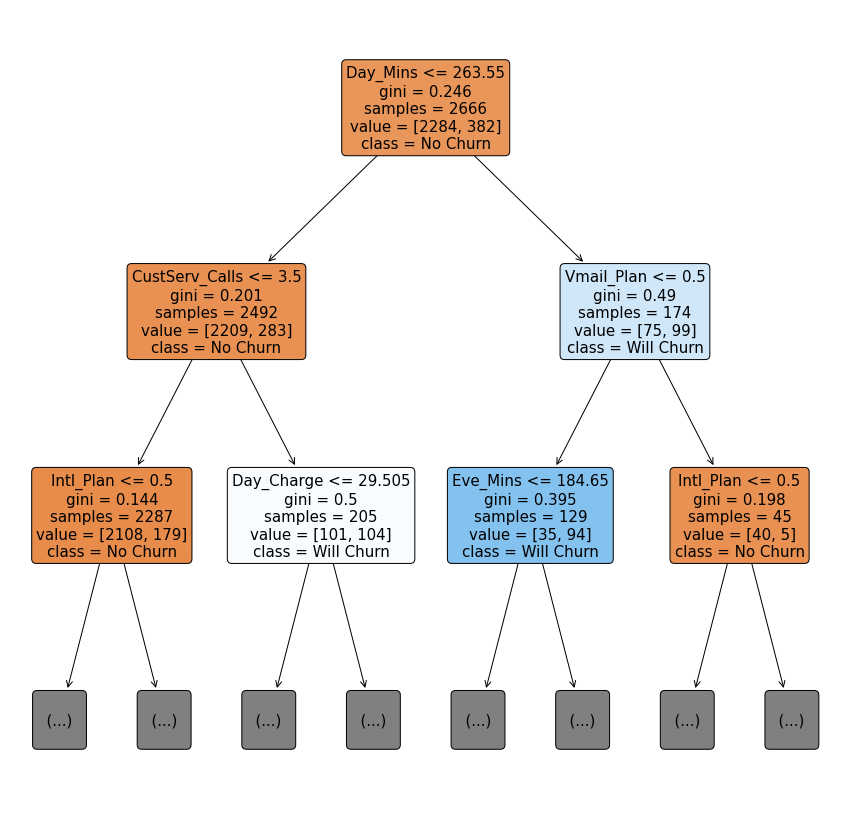

In [136]:
# plot a decision tree from gridsearchCV, here used gri
plt.figure(figsize = (15, 15))
plot_tree(grid_result.best_estimator_, 
          filled=True,
          rounded=True, 
          class_names = ["No Churn", "Will Churn"],
          feature_names = features.columns,
          max_depth=2, fontsize=15)

plt.show()

**Model performance evaluation with the best found model in grid search and cross-validation**

**Confusion Matrix**

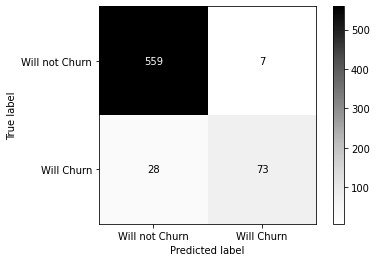

In [137]:
plot_confusion_matrix(grid_result, 
                      X_test, 
                      y_test, 
                      display_labels=["Will not Churn", "Will Churn"],
                      cmap='Greys',values_format='')
plt.show()

**Comment:** In the confusion matrix, 559 + 7 = 566 customer that will not churn, 559 (98.76%) were correctly classified. 28 + 73 = 101 customer that will churn, 73 (72.28%) were correctly classified.

**Accuracy**

In [138]:
print('Accuracy: ', accuracy_score(y_test, y_pred))

Accuracy:  0.9475262368815592


**Comment:**  model accuracy is **94%** means that 6 of every 100 labels is incorrect, and 94 is correct for predicting **Customer Churn**.

**Classification report**

In [139]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       566
           1       0.91      0.72      0.81       101

    accuracy                           0.95       667
   macro avg       0.93      0.86      0.89       667
weighted avg       0.95      0.95      0.94       667



**Comment:**


1. **Precision**= Out of all the examples that predicted as True(will churn), how many are really True (will churn)?
 here 91% means that model predicted as positive(**will Churn**) **(73 + 7 =80**), but really positive (**will Churn)** only 73 customer.
2. **recall:** = Out of all the True examples, how many are predicted as True? Here 72% means that all True(**will churn**) are (28 +73 = 101), but model predicted as True (**will churn**) only 73
3. **f1-score:** This is the harmonic mean of Precision and Recall and gives a better measure of the incorrectly classified cases than the Accuracy Metric.In most real-life classification problems, imbalanced class distribution exists and thus F1-score is a better metric to evaluate our model on. The higher the F1 score the better, with 0 being the worst possible and 1 being the best.
Here model f1-score is **0.81** for prediction customer will churn.

**ROC: Receiver Operating Characterisitcs and AUC: Area Under the Curve**

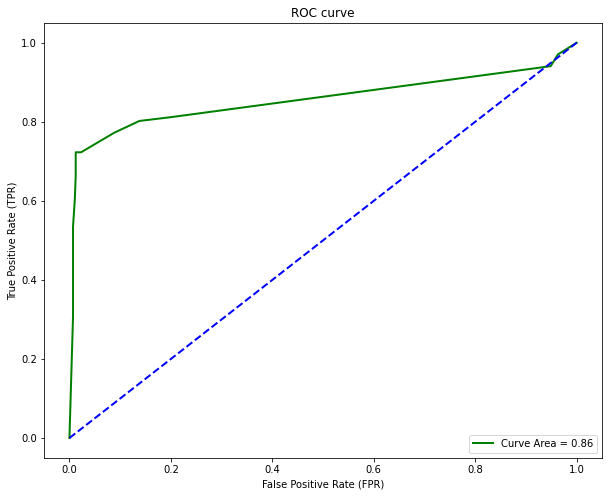

In [140]:
fpr, tpr, thr = roc_curve(y_test, grid_result.predict_proba(X_test)[:,1])
auc = np.round(roc_auc_score(y_test, y_pred), 2)

plt.figure(figsize=(10, 8))
plt.plot(fpr, 
         tpr, 
         color='green', 
         lw=2, 
         label="Curve Area = " +str(auc))

plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

**Comment:** Here model AUC value is 0.86 that means the classifier is able to detect more numbers of True positives and True negatives than False negatives and False positives.

**References:**
1. https://medium.com/analytics-vidhya/accuracy-vs-f1-score-6258237beca2 
2. https://learn.datacamp.com/courses/marketing-analytics-predicting-customer-churn-in-python